In [1]:
#!pip install tqdm
#!pip install progress
#!pip install sklearn

In [2]:
import tensorflow as tf
import sys
import math
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
#import cv2
import dataset_utils
import inception_preprocessing
import inception_v3 as v3


from sklearn.model_selection import train_test_split
from tqdm import tqdm
#from getvector import getvector
from tensorflow.python.platform import gfile
from progress.bar import Bar
from math import floor, ceil, pi
#from PIL import Image

%matplotlib inline



# Entrenamiento

## Extracción de características usando InceptionV3

En esta sección se realiza lo siguiente:
- Carga de mamografías según su clase.
- Aumentación de datos

Inception-V3 is processing 20 samples:   0%|          | 0/20 [00:00<?, ?it/s]

Clase:  Cancer Índice:  0
File glob:  data/DM Images/train/Cancer/*.jpg
Samples:  20
one hot:  [ 1.  0.]


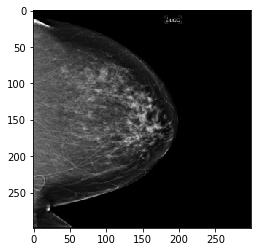

Inception-V3 is processing 20 samples:   5%|▌         | 1/20 [00:03<01:07,  3.56s/it]

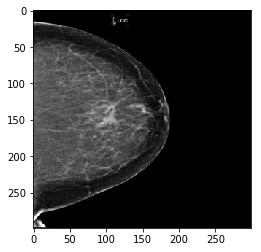

Inception-V3 is processing 20 samples:  10%|█         | 2/20 [00:06<00:59,  3.32s/it]

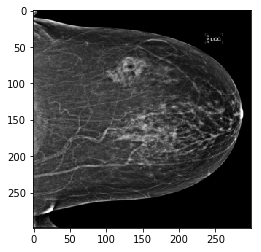

Inception-V3 is processing 20 samples:  15%|█▌        | 3/20 [00:09<00:53,  3.17s/it]

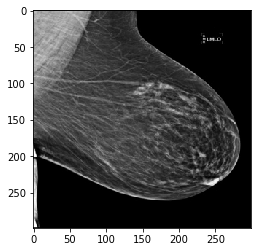

Inception-V3 is processing 20 samples:  20%|██        | 4/20 [00:11<00:48,  3.06s/it]

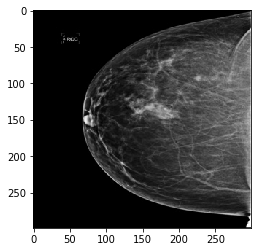

Inception-V3 is processing 20 samples:  25%|██▌       | 5/20 [00:14<00:44,  2.98s/it]

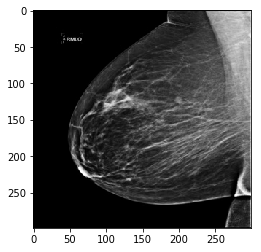

Inception-V3 is processing 20 samples:  30%|███       | 6/20 [00:17<00:41,  2.94s/it]

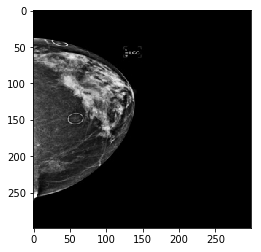

Inception-V3 is processing 20 samples:  35%|███▌      | 7/20 [00:20<00:37,  2.89s/it]

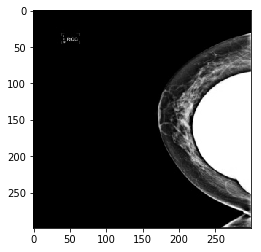

Inception-V3 is processing 20 samples:  40%|████      | 8/20 [00:23<00:34,  2.86s/it]

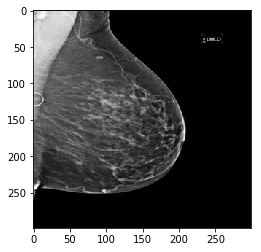

Inception-V3 is processing 20 samples:  45%|████▌     | 9/20 [00:26<00:31,  2.89s/it]

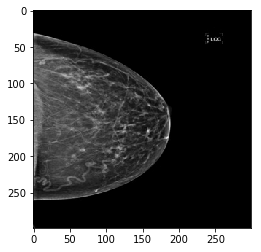

Inception-V3 is processing 20 samples:  50%|█████     | 10/20 [00:29<00:29,  2.94s/it]

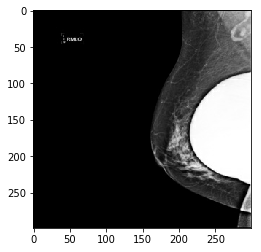

Inception-V3 is processing 20 samples:  55%|█████▌    | 11/20 [00:31<00:26,  2.90s/it]

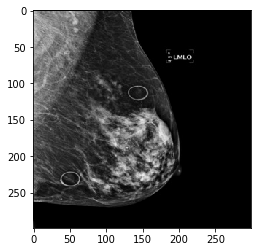

Inception-V3 is processing 20 samples:  60%|██████    | 12/20 [00:34<00:22,  2.87s/it]

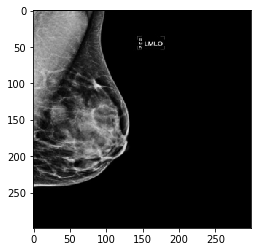

Inception-V3 is processing 20 samples:  65%|██████▌   | 13/20 [00:37<00:19,  2.85s/it]

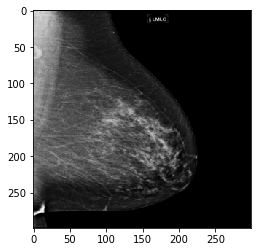

Inception-V3 is processing 20 samples:  70%|███████   | 14/20 [00:40<00:17,  2.85s/it]

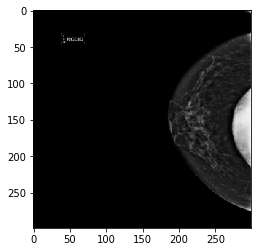

Inception-V3 is processing 20 samples:  75%|███████▌  | 15/20 [00:43<00:14,  2.83s/it]

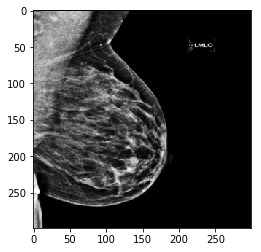

Inception-V3 is processing 20 samples:  80%|████████  | 16/20 [00:46<00:11,  2.82s/it]

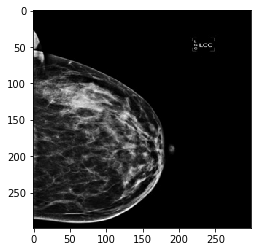

Inception-V3 is processing 20 samples:  85%|████████▌ | 17/20 [00:48<00:08,  2.83s/it]

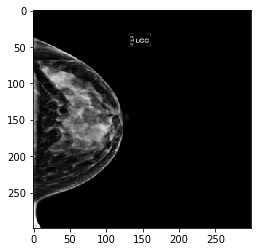

Inception-V3 is processing 20 samples:  90%|█████████ | 18/20 [00:51<00:05,  2.84s/it]

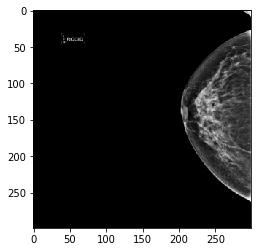

Inception-V3 is processing 20 samples:  95%|█████████▌| 19/20 [00:54<00:02,  2.84s/it]

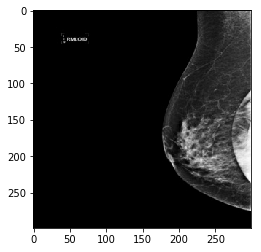

Inception-V3 is processing 60 samples:   0%|          | 0/60 [00:00<?, ?it/s]

Clase:  NoCancer Índice:  1
File glob:  data/DM Images/train/NoCancer/*.jpg
Samples:  60
one hot:  [ 0.  1.]


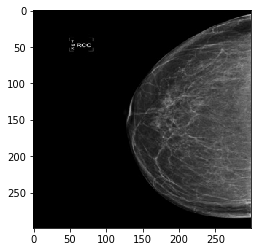

Inception-V3 is processing 60 samples:   2%|▏         | 1/60 [00:02<02:46,  2.83s/it]

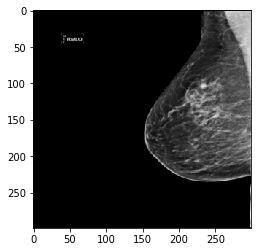

Inception-V3 is processing 60 samples:   3%|▎         | 2/60 [00:05<02:44,  2.83s/it]

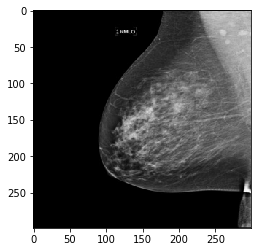

Inception-V3 is processing 60 samples:   5%|▌         | 3/60 [00:08<02:40,  2.82s/it]

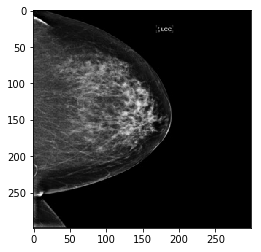

Inception-V3 is processing 60 samples:   7%|▋         | 4/60 [00:11<02:37,  2.81s/it]

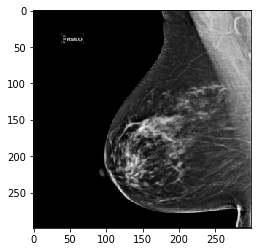

Inception-V3 is processing 60 samples:   8%|▊         | 5/60 [00:14<02:35,  2.82s/it]

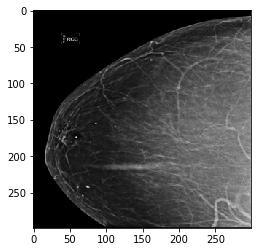

Inception-V3 is processing 60 samples:  10%|█         | 6/60 [00:16<02:33,  2.84s/it]

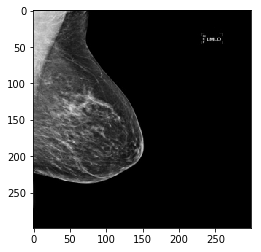

Inception-V3 is processing 60 samples:  12%|█▏        | 7/60 [00:19<02:29,  2.82s/it]

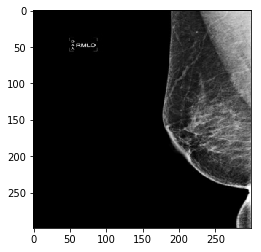

Inception-V3 is processing 60 samples:  13%|█▎        | 8/60 [00:22<02:25,  2.81s/it]

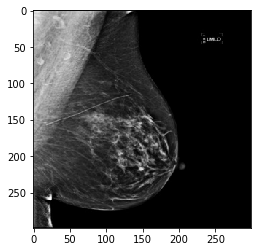

Inception-V3 is processing 60 samples:  15%|█▌        | 9/60 [00:25<02:23,  2.81s/it]

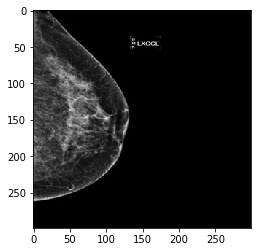

Inception-V3 is processing 60 samples:  17%|█▋        | 10/60 [00:28<02:21,  2.83s/it]

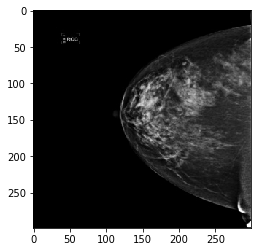

Inception-V3 is processing 60 samples:  18%|█▊        | 11/60 [00:31<02:17,  2.81s/it]

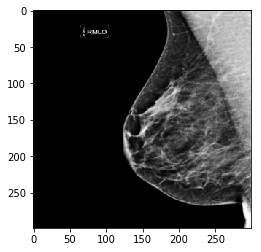

Inception-V3 is processing 60 samples:  20%|██        | 12/60 [00:33<02:14,  2.80s/it]

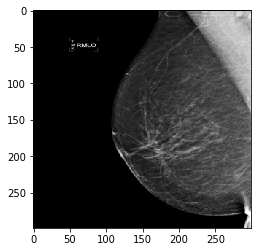

Inception-V3 is processing 60 samples:  22%|██▏       | 13/60 [00:36<02:11,  2.80s/it]

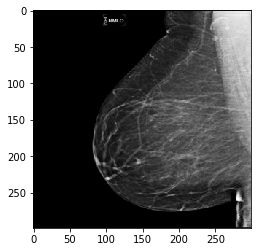

Inception-V3 is processing 60 samples:  23%|██▎       | 14/60 [00:39<02:09,  2.81s/it]

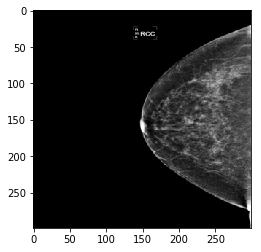

Inception-V3 is processing 60 samples:  25%|██▌       | 15/60 [00:42<02:05,  2.79s/it]

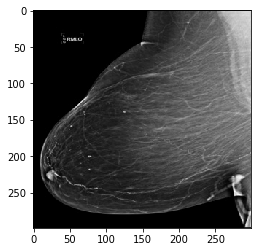

Inception-V3 is processing 60 samples:  27%|██▋       | 16/60 [00:44<02:03,  2.80s/it]

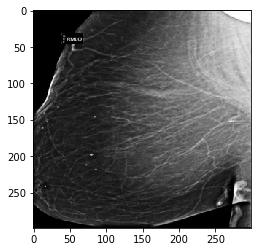

Inception-V3 is processing 60 samples:  28%|██▊       | 17/60 [00:47<02:03,  2.86s/it]

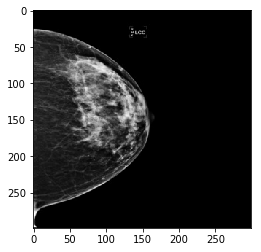

Inception-V3 is processing 60 samples:  30%|███       | 18/60 [00:50<02:01,  2.89s/it]

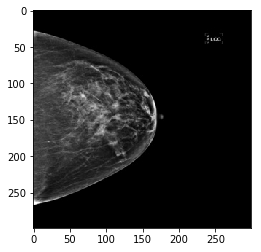

Inception-V3 is processing 60 samples:  32%|███▏      | 19/60 [00:53<01:57,  2.86s/it]

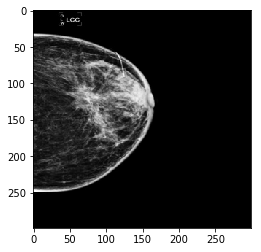

Inception-V3 is processing 60 samples:  33%|███▎      | 20/60 [00:56<01:53,  2.83s/it]

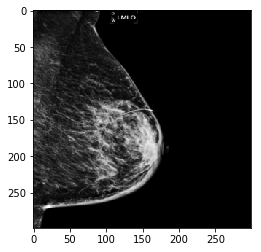

Inception-V3 is processing 60 samples:  35%|███▌      | 21/60 [00:59<01:50,  2.82s/it]

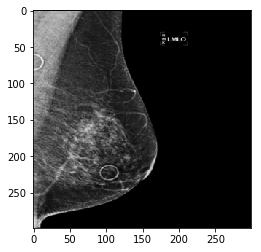

Inception-V3 is processing 60 samples:  37%|███▋      | 22/60 [01:02<01:47,  2.83s/it]

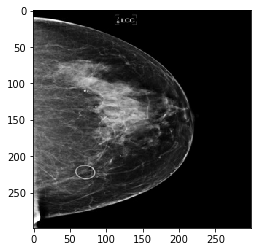

Inception-V3 is processing 60 samples:  38%|███▊      | 23/60 [01:04<01:44,  2.81s/it]

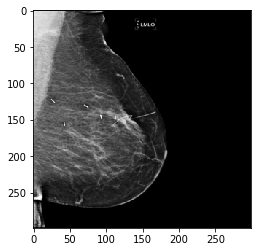

Inception-V3 is processing 60 samples:  40%|████      | 24/60 [01:07<01:40,  2.79s/it]

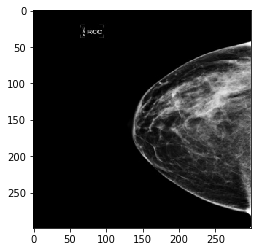

Inception-V3 is processing 60 samples:  42%|████▏     | 25/60 [01:10<01:37,  2.80s/it]

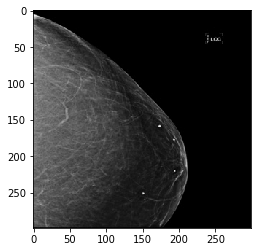

Inception-V3 is processing 60 samples:  43%|████▎     | 26/60 [01:13<01:35,  2.81s/it]

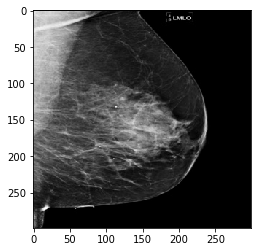

Inception-V3 is processing 60 samples:  45%|████▌     | 27/60 [01:16<01:32,  2.81s/it]

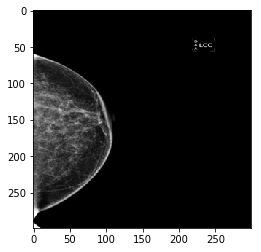

Inception-V3 is processing 60 samples:  47%|████▋     | 28/60 [01:18<01:29,  2.79s/it]

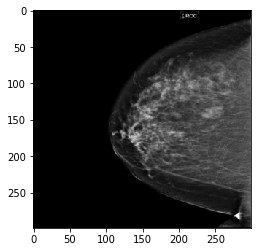

Inception-V3 is processing 60 samples:  48%|████▊     | 29/60 [01:21<01:26,  2.80s/it]

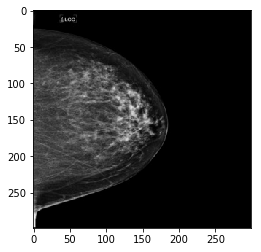

Inception-V3 is processing 60 samples:  50%|█████     | 30/60 [01:24<01:24,  2.81s/it]

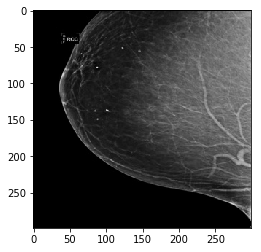

Inception-V3 is processing 60 samples:  52%|█████▏    | 31/60 [01:27<01:21,  2.80s/it]

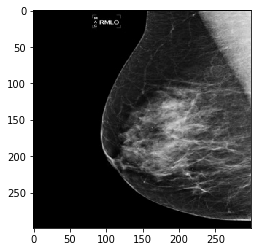

Inception-V3 is processing 60 samples:  53%|█████▎    | 32/60 [01:30<01:18,  2.80s/it]

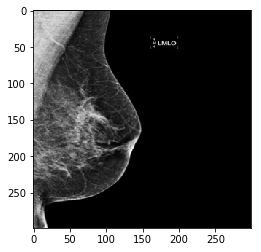

Inception-V3 is processing 60 samples:  55%|█████▌    | 33/60 [01:32<01:16,  2.82s/it]

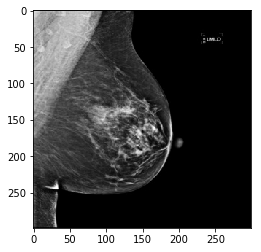

Inception-V3 is processing 60 samples:  57%|█████▋    | 34/60 [01:35<01:13,  2.81s/it]

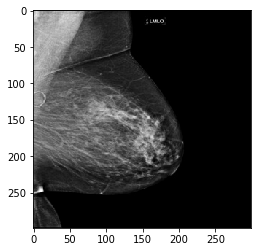

Inception-V3 is processing 60 samples:  58%|█████▊    | 35/60 [01:38<01:10,  2.81s/it]

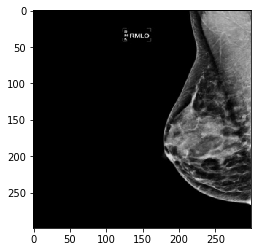

Inception-V3 is processing 60 samples:  60%|██████    | 36/60 [01:41<01:07,  2.80s/it]

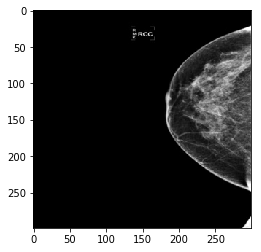

Inception-V3 is processing 60 samples:  62%|██████▏   | 37/60 [01:44<01:04,  2.80s/it]

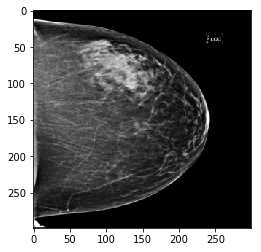

Inception-V3 is processing 60 samples:  63%|██████▎   | 38/60 [01:46<01:01,  2.81s/it]

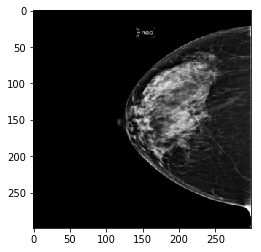

Inception-V3 is processing 60 samples:  65%|██████▌   | 39/60 [01:49<00:58,  2.81s/it]

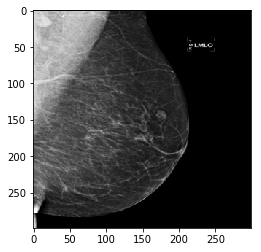

Inception-V3 is processing 60 samples:  67%|██████▋   | 40/60 [01:52<00:56,  2.81s/it]

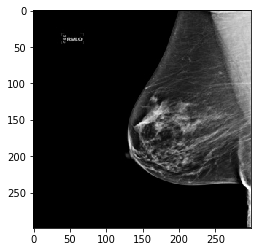

Inception-V3 is processing 60 samples:  68%|██████▊   | 41/60 [01:55<00:53,  2.81s/it]

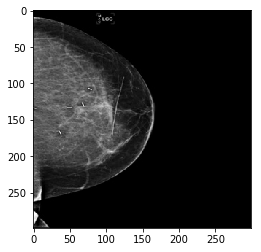

Inception-V3 is processing 60 samples:  70%|███████   | 42/60 [01:58<00:50,  2.82s/it]

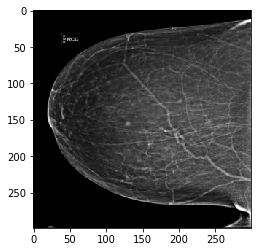

Inception-V3 is processing 60 samples:  72%|███████▏  | 43/60 [02:01<00:47,  2.81s/it]

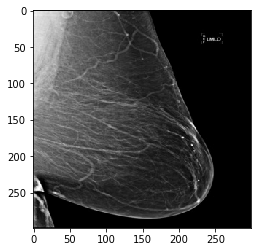

Inception-V3 is processing 60 samples:  73%|███████▎  | 44/60 [02:03<00:44,  2.81s/it]

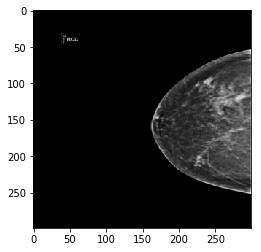

Inception-V3 is processing 60 samples:  75%|███████▌  | 45/60 [02:06<00:42,  2.80s/it]

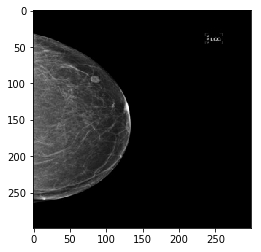

Inception-V3 is processing 60 samples:  77%|███████▋  | 46/60 [02:09<00:39,  2.82s/it]

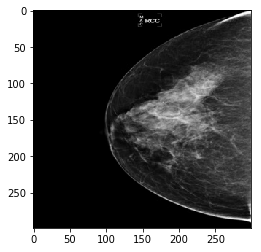

Inception-V3 is processing 60 samples:  78%|███████▊  | 47/60 [02:12<00:36,  2.81s/it]

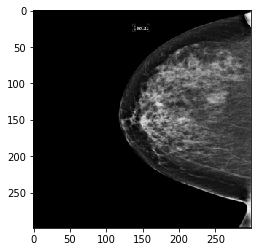

Inception-V3 is processing 60 samples:  80%|████████  | 48/60 [02:15<00:33,  2.80s/it]

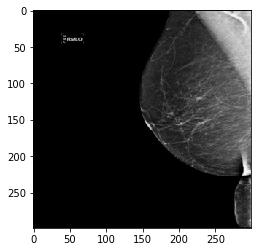

Inception-V3 is processing 60 samples:  82%|████████▏ | 49/60 [02:17<00:30,  2.79s/it]

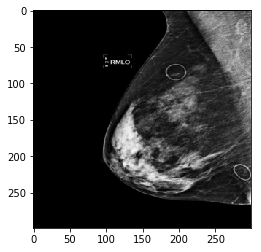

Inception-V3 is processing 60 samples:  83%|████████▎ | 50/60 [02:20<00:28,  2.80s/it]

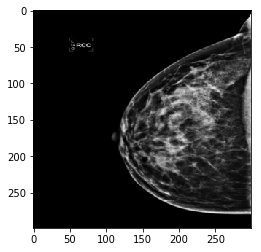

Inception-V3 is processing 60 samples:  85%|████████▌ | 51/60 [02:23<00:25,  2.81s/it]

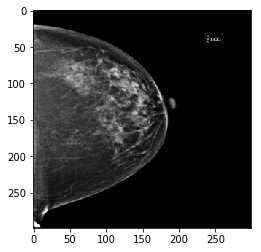

Inception-V3 is processing 60 samples:  87%|████████▋ | 52/60 [02:26<00:22,  2.80s/it]

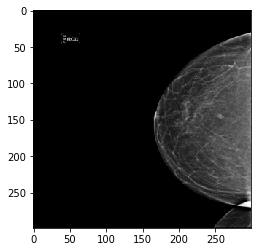

Inception-V3 is processing 60 samples:  88%|████████▊ | 53/60 [02:29<00:19,  2.80s/it]

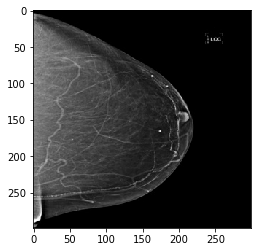

Inception-V3 is processing 60 samples:  90%|█████████ | 54/60 [02:31<00:16,  2.81s/it]

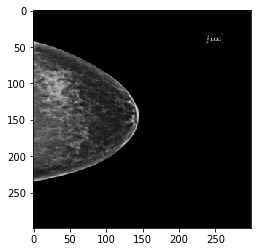

Inception-V3 is processing 60 samples:  92%|█████████▏| 55/60 [02:34<00:14,  2.80s/it]

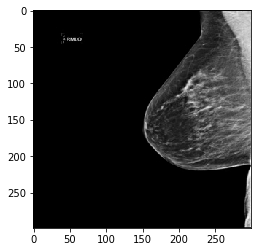

Inception-V3 is processing 60 samples:  93%|█████████▎| 56/60 [02:37<00:11,  2.78s/it]

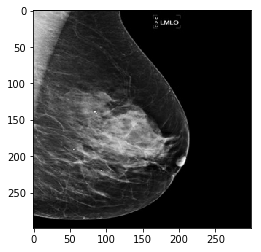

Inception-V3 is processing 60 samples:  95%|█████████▌| 57/60 [02:40<00:08,  2.80s/it]

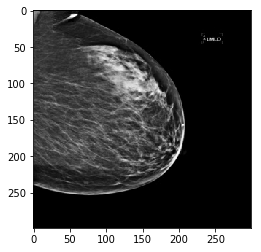

Inception-V3 is processing 60 samples:  97%|█████████▋| 58/60 [02:43<00:05,  2.81s/it]

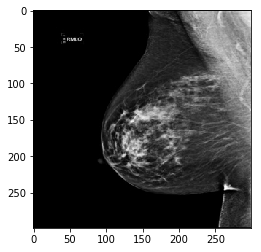

Inception-V3 is processing 60 samples:  98%|█████████▊| 59/60 [02:45<00:02,  2.79s/it]

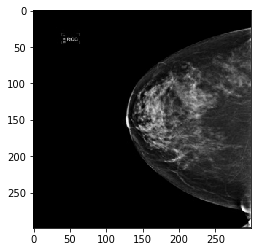

Inception-V3 is processing 60 samples: 100%|██████████| 60/60 [02:48<00:00,  2.78s/it]

Datos grabados en un archivo.


In [3]:
#Vector que extrae las características
def getvector(imagedir, is_training = False, image_type = 'jpg'):
    slim = tf.contrib.slim

    batch_size = 3
    image_size = v3.inception_v3.default_image_size

    url = "http://download.tensorflow.org/models/inception_v3_2016_08_28.tar.gz"
    checkpoints_dir = os.getcwd()

    if not tf.gfile.Exists(checkpoints_dir + '/inception_v3.ckpt'):
        dataset_utils.download_and_uncompress_tarball(url, checkpoints_dir)

    with tf.Graph().as_default():
        # imagedir = '/home/jiexun/Desktop/Siraj/ImageChallenge/Necessary/train/cat.0.jpg'
        image_string = tf.read_file(imagedir)
        
        if (image_type.lower() == 'jpg'):
            image = tf.image.decode_jpeg(image_string, channels=3)
        elif (image_type.lower() == 'png'):
            image = tf.image.decode_png(image_string, channels=3)
        else:
            return None
        
        processed_image = inception_preprocessing.preprocess_image(image, image_size, image_size, is_training)
        processed_images = tf.expand_dims(processed_image, 0)

        # Create the model, use the default arg scope to configure the batch norm parameters.
        #print('Inicializando el modelo InceptionV3...')
        with slim.arg_scope(v3.inception_v3_arg_scope()):
            num_classes=1001
            vector, _ = v3.inception_v3(processed_images, num_classes, is_training)
        
        
        init_fn = slim.assign_from_checkpoint_fn(os.path.join(checkpoints_dir, 'inception_v3.ckpt'),
                                                 slim.get_model_variables('InceptionV3'))
        
        with tf.Session() as sess:
            init_fn(sess)
            np_image, vector = sess.run([image, vector])
            
            plt.imshow(np_image)
            plt.show()
            im = sess.run(processed_image)
            #print(im)
            #plt.imshow(im, cmap = 'gray')
            #plt.show()
            #img = processed_image.eval()
            #Image.fromarray(np.asarray(img)).show()

        a = np.asarray([x for xs in vector for xss in xs for xsss in xss for x in xsss])
        np.reshape(a, (1, 2048))

    return a


#Procesamiento
data_inputs = []
data_labels = []

# Checking if the 2048-dimensional vector representations of the training images are already available
if os.path.isfile('./data/DM Images/data_inputs.txt') and os.path.isfile('./data/DM Images/data_labels.txt'):
    data_inputs = np.loadtxt('./data/DM Images/data_inputs.txt')
    data_labels = np.loadtxt('./data/DM Images/data_labels.txt')
    print('Datos cargados de un archivo.')

else: 
    #tf.reset_default_graph()
    # add in your images here if you want to train the model on your own images
    data_dir = 'data/DM Images/train'
    
    #Cuenta la cantidad de directorios/clases
    n_classes = 0
    for o in os.listdir(data_dir):
        if not o.startswith('.'):
            n_classes = n_classes + 1
    
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
    tf.logging.set_verbosity(tf.logging.ERROR)
    
    i_class = 0
    for o in os.listdir(data_dir):
        if not o.startswith('.'):     
            class_name = os.path.join(o)
            print("Clase: ", class_name, "Índice: ",  i_class)

            file_list = []
            file_glob = os.path.join(data_dir, class_name, '*.jpg');
            print('File glob: ', file_glob)
            file_list.extend(gfile.Glob(file_glob))
            print('Samples: ', len(file_list))

            #file_list = file_list[0:4]
            #bar = Bar('Inception-V3 is processing images:', max=300)
            #bar = Bar('Inception-V3 is processing images:', max=len(file_list))
            
            one_hot_row = np.zeros(n_classes)             
            one_hot_row[i_class] = 1
            print('one hot: ', one_hot_row)
            
            pbar = tqdm(total=len(file_list))
            pbar.set_description("Inception-V3 is processing %i samples" % len(file_list))
            for file_name in file_list:
                #tqdm.write("Processing:  %s" % file_name)
                #Extrae características
                data_inputs.append(getvector(file_name, True, 'jpg'))
                data_labels.append(one_hot_row)
                
                #bar.next()
                pbar.update(1)
            i_class = i_class + 1
            pbar.close()
    #bar.finish()
    
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'
    tf.logging.set_verbosity(tf.logging.DEBUG)
    
    np.savetxt('data/DM Images/data_inputs.txt', data_inputs)
    np.savetxt('data/DM Images/data_labels.txt', data_labels)
    
    print('Datos grabados en un archivo.')
    



## Se configuran los parámetros iniciales

In [4]:
# Splitting into train, val, and test
train_inputs, valtest_inputs, train_labels, valtest_labels = train_test_split(data_inputs, data_labels, test_size=0.3, random_state=42)
val_inputs, test_inputs, val_labels, test_labels = train_test_split(valtest_inputs, valtest_labels, test_size=0.4, random_state=43)

In [5]:
# Setting hyperparameters
learning_rate = 0.01
batch_size = 64
epochs = 100
log_batch_step = 50

In [6]:
# useful info
n_features = np.size(train_inputs, 1)
n_labels = np.size(train_labels, 1)

In [7]:
# Placeholders for input features and labels
inputs = tf.placeholder(tf.float32, (None, n_features))
labels = tf.placeholder(tf.float32, (None, n_labels))

In [8]:
# Setting up weights and bias
weights = tf.Variable(tf.truncated_normal((n_features, n_labels), stddev=0.1), name='weights')
bias = tf.Variable(tf.zeros(n_labels), name='bias')
tf.add_to_collection('vars', weights)
tf.add_to_collection('vars', bias)

In [9]:
# Setting up operation in fully connected layer
logits = tf.add(tf.matmul(inputs, weights), bias)
prediction = tf.nn.softmax(logits)
tf.add_to_collection('pred', prediction)

In [10]:
# Defining loss of network
difference = tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits)
loss = tf.reduce_sum(difference)

In [11]:
# Setting optimiser
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [12]:
# Define accuracy
is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

saver = tf.train.Saver((weights, bias))

## Carga del modelo Inception

Aquí se debe realizar el transfer learning
(congelar las últimas capas del modelo y entrenar)

In [13]:
# Run tensorflow session
history = {'val_acc':[], 'val_loss':[]}
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Running the training in batches 
    batch_count = int(math.ceil(len(train_inputs)/batch_size))

    for epoch_i in range(epochs):
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_inputs = train_inputs[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]
            # Run optimizer
            _ = sess.run(optimizer, feed_dict={inputs: batch_inputs, labels: batch_labels})

        # Check accuracy against validation data
        val_accuracy, val_loss = sess.run([accuracy, loss], feed_dict={inputs: val_inputs, labels: val_labels})
        history['val_acc'].append(val_accuracy)
        history['val_loss'].append(val_loss)
        
        print("After epoch {}, Loss: {}, Accuracy: {}".format(epoch_i+1, val_loss, val_accuracy))

    g = tf.get_default_graph()
    saver.save(sess, './testsave')
    

Epoch 61/100: 100%|██████████| 1/1 [00:00<00:00, 472.07batches/s]

After epoch 1, Loss: 102.91301727294922, Accuracy: 0.2857142984867096
After epoch 2, Loss: 20.505325317382812, Accuracy: 0.2857142984867096
After epoch 3, Loss: 31.026878356933594, Accuracy: 0.7142857313156128
After epoch 4, Loss: 56.10248565673828, Accuracy: 0.7142857313156128
After epoch 5, Loss: 70.9191665649414, Accuracy: 0.7142857313156128
After epoch 6, Loss: 77.92278289794922, Accuracy: 0.7142857313156128
After epoch 7, Loss: 78.72476959228516, Accuracy: 0.7142857313156128
After epoch 8, Loss: 74.45983123779297, Accuracy: 0.7142857313156128
After epoch 9, Loss: 65.96660614013672, Accuracy: 0.7142857313156128
After epoch 10, Loss: 53.887596130371094, Accuracy: 0.7142857313156128
After epoch 11, Loss: 38.72953796386719, Accuracy: 0.7142857313156128
After epoch 12, Loss: 20.960649490356445, Accuracy: 0.7142857313156128
After epoch 13, Loss: 8.191530227661133, Accuracy: 0.7142857313156128
After epoch 14, Loss: 31.222354888916016, Accuracy: 0.2857142984867096
After epoch 15, Loss: 29


Epoch 100/100: 100%|██████████| 1/1 [00:00<00:00, 1308.27batches/s]


After epoch 61, Loss: 8.53575325012207, Accuracy: 0.7142857313156128
After epoch 62, Loss: 8.94619369506836, Accuracy: 0.7142857313156128
After epoch 63, Loss: 9.638973236083984, Accuracy: 0.7142857313156128
After epoch 64, Loss: 10.507454872131348, Accuracy: 0.7142857313156128
After epoch 65, Loss: 11.366718292236328, Accuracy: 0.7142857313156128
After epoch 66, Loss: 12.02990436553955, Accuracy: 0.7142857313156128
After epoch 67, Loss: 12.368867874145508, Accuracy: 0.7142857313156128
After epoch 68, Loss: 12.343917846679688, Accuracy: 0.7142857313156128
After epoch 69, Loss: 12.00398063659668, Accuracy: 0.7142857313156128
After epoch 70, Loss: 11.461174964904785, Accuracy: 0.7142857313156128
After epoch 71, Loss: 10.851468086242676, Accuracy: 0.7142857313156128
After epoch 72, Loss: 10.296791076660156, Accuracy: 0.7142857313156128
After epoch 73, Loss: 9.88046932220459, Accuracy: 0.7142857313156128
After epoch 74, Loss: 9.64169692993164, Accuracy: 0.7142857313156128
After epoch 75, L

## Métricas

/home/grupoavatar/.local/lib/python3.5/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


{'val_loss': [102.91302, 20.505325, 31.026878, 56.102486, 70.919167, 77.922783, 78.72477, 74.459831, 65.966606, 53.887596, 38.729538, 20.960649, 8.1915302, 31.222355, 29.24836, 9.4253674, 13.757842, 23.792818, 29.807404, 31.85461, 30.306356, 25.522968, 17.937027, 9.3763428, 10.328585, 15.766779, 10.108538, 8.5784178, 14.194189, 18.526012, 19.69772, 17.786297, 13.497859, 8.9473953, 7.9565206, 9.4867687, 8.4726524, 7.9519339, 10.470846, 13.628022, 15.422014, 15.244799, 13.383369, 10.770379, 8.6626358, 7.8444133, 7.8290091, 7.8143353, 8.1649637, 9.3835154, 11.112003, 12.65189, 13.484577, 13.418893, 12.583376, 11.327812, 10.065135, 9.1111126, 8.5805912, 8.4141273, 8.5357533, 8.9461937, 9.6389732, 10.507455, 11.366718, 12.029904, 12.368868, 12.343918, 12.003981, 11.461175, 10.851468, 10.296791, 9.8804693, 9.6416969, 9.5867519, 9.7042618, 9.9709435, 10.347803, 10.778181, 11.194929, 11.533943, 11.747805, 11.814774, 11.741121, 11.556828, 11.306623, 11.039379, 10.798859, 10.617788, 10.515644, 1

/home/grupoavatar/.local/lib/python3.5/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


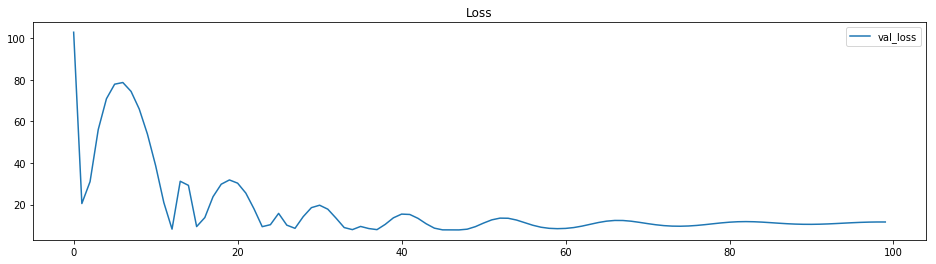

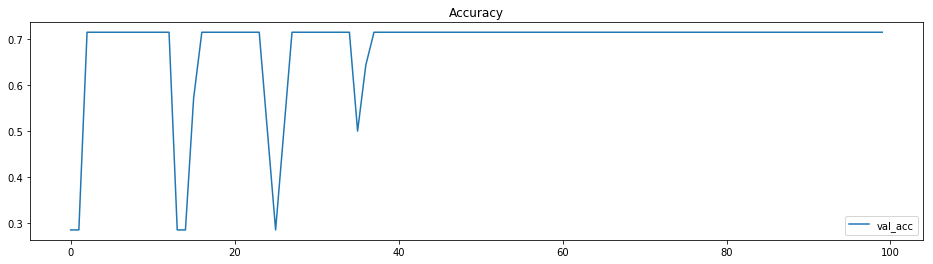

In [14]:
print(history)

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(history)
#display(df)

df.plot(y=['val_loss'], figsize=(16,4), title='Loss')
df.plot(y=['val_acc'], figsize=(16,4), title='Accuracy');

## Pruebas unitarias

In [17]:
def predict(prediction, file_name = 'cat.jpg'):
    #try: 
    #    file_name = 'cat.jpg'
    #except IndexError:
    #    print ('please enter image file path.........')
    #    exit()
    image_input = getvector(file_name).reshape((1,2048))
    #if 'cat' in file_name:
    #    image_label = [[1, 0]]
    #else:
    #    image_label = [[0, 1]]

    with tf.Session() as sess:
        new_saver = tf.train.import_meta_graph('testsave.meta')
        new_saver.restore(sess, tf.train.latest_checkpoint('./'))

        pred = sess.run(prediction, feed_dict={inputs: image_input})

        return pred

INFO:tensorflow:Restoring parameters from /home/grupoavatar/inf659-inception/transfer_learning/inception_v3.ckpt


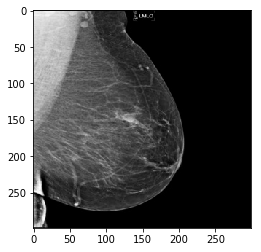

INFO:tensorflow:Restoring parameters from ./testsave
Predict: Cancer/337671.jpg



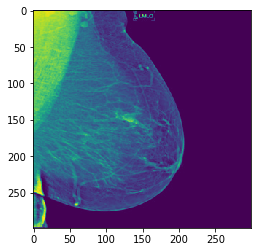

Cancer: 0.020510157570242882, NoCancer: 0.9794898629188538




INFO:tensorflow:Restoring parameters from /home/grupoavatar/inf659-inception/transfer_learning/inception_v3.ckpt


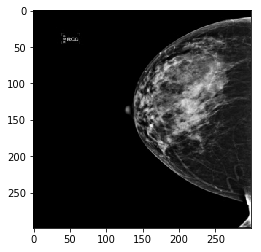

INFO:tensorflow:Restoring parameters from ./testsave
Predict: NoCancer/288567.jpg



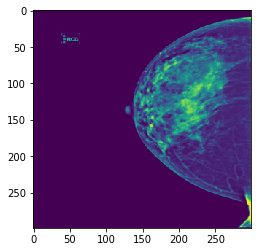

Cancer: 0.013263460248708725, NoCancer: 0.9867364764213562


In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pred = predict(prediction, 'data/DM Images/validation/Cancer/337671.jpg')
print('Predict: Cancer/337671.jpg\n', )
img=mpimg.imread('data/DM Images/validation/Cancer/337671.jpg')
imgplot = plt.imshow(img)
plt.show()
print ('Cancer: {}, NoCancer: {}'.format(pred[0][0], pred[0][1]))
print('\n\n\n')

pred = predict(prediction, 'data/DM Images/validation/NoCancer/288567.jpg')
print('Predict: NoCancer/288567.jpg\n', )
img=mpimg.imread('data/DM Images/validation/NoCancer/288567.jpg')
imgplot = plt.imshow(img)
plt.show()
print ('Cancer: {}, NoCancer: {}'.format(pred[0][0], pred[0][1]))
